Importing Dependenices


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("ggplot")
import re                                                                        # to work with regular expressions
from nltk.tokenize import word_tokenize                                          # for breaking words
from nltk.stem.porter import PorterStemmer                                       # to get to the root of the word like loved --> love
from nltk.corpus import stopwords                                                # for removing useless words
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud                                                  # visual representation of most common words
from sklearn.feature_extraction.text import TfidfVectorizer                      # convert words into numbers

In [61]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [62]:
df.shape

(50000, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Distribution Count')

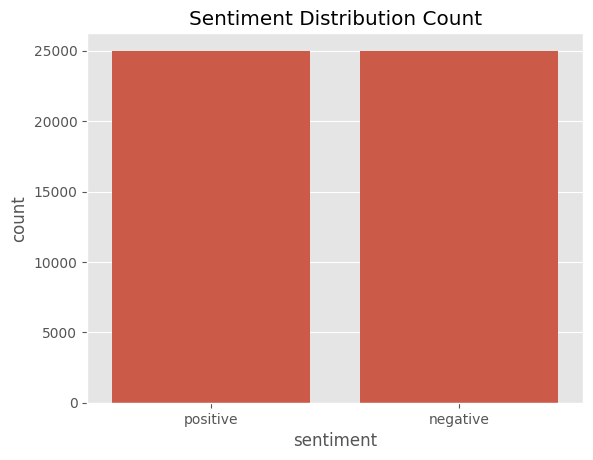

In [64]:
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution Count")

**Count Words**

In [80]:
for i in range(5):
    print("Review:", i+1)
    print(df['review'].iloc[i], "\n")
    print("Sentiment:", df['sentiment'].iloc[i], "\n\n")


Review: 1
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [66]:
def no_of_words(text):
  words = text.split()
  word_count=len(words)
  return word_count

In [67]:
df['word_count'] = df['review'].apply(no_of_words)

In [68]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


**Review Distribution**


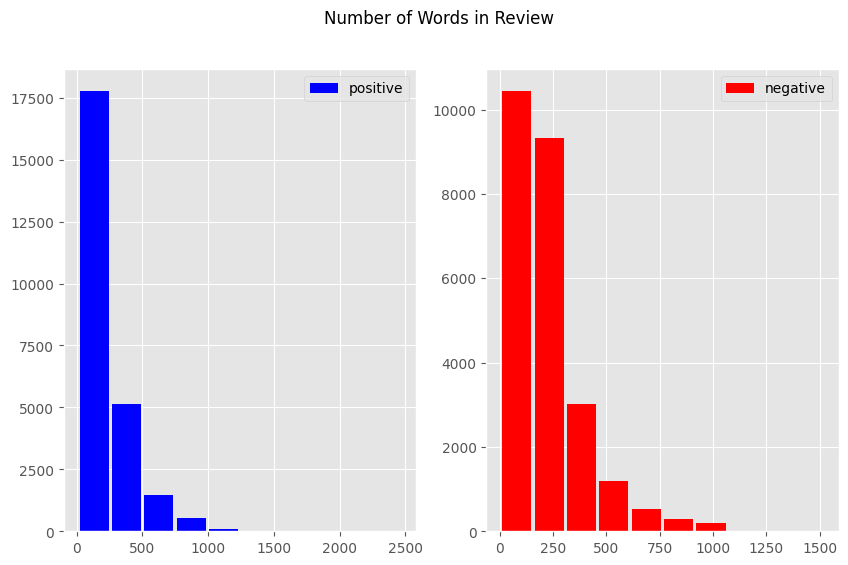

In [69]:
fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == "positive"]['word_count'],label = 'positive', color = 'blue',rwidth = 0.9)
ax[0].legend(loc = "upper right")
ax[1].hist(df[df['sentiment'] == "negative"]['word_count'],label = 'negative', color = 'red', rwidth = 0.9)
ax[1].legend(loc = "upper right")
fig.suptitle("Number of Words in Review")
plt.show()

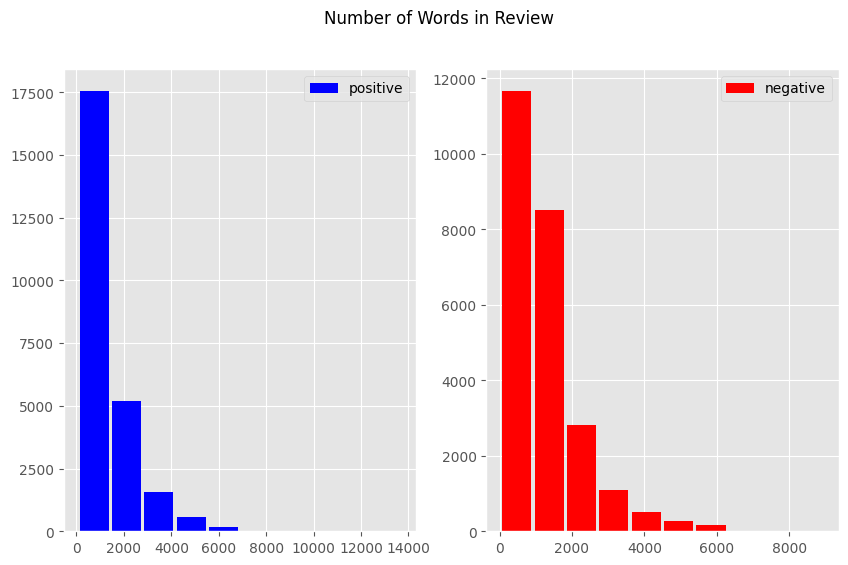

In [70]:
fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == "positive"]['review'].str.len(),label = 'positive', color = 'blue',rwidth = 0.9)
ax[0].legend(loc = "upper right")
ax[1].hist(df[df['sentiment'] == "negative"]['review'].str.len(),label = 'negative', color = 'red', rwidth = 0.9)
ax[1].legend(loc = "upper right")
fig.suptitle("Number of Words in Review")
plt.show()

In [71]:
df['sentiment'].replace("positive", 1, inplace = True)
df['sentiment'].replace("negative", 2, inplace = True)

<ipython-input-71-ec152ecf5611>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace("positive", 1, inplace = True)
<ipython-input-71-ec152ecf5611>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [72]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


**Data Preprocessing**

In [73]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) # removing break words
    text = re.sub(r"https\S+|http\S+", '', text , flags = re.MULTILINE) # removing url tags
    text = re.sub(r"\@w+|\#", '', text) # removing hashtags and add symbol
    text = re.sub(r'[^\w\s]','',text) # removing the punctutations
    text_tokens = word_tokenize(text) # removing stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [74]:
df.review = df['review'].apply(data_processing)

In [75]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate enteries :" , duplicated_count)

Number of duplicate enteries : 421


In [76]:
df = df.drop_duplicates("review")

**Stemming**

In [77]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [78]:
df.review = df['review'].apply(lambda x: stemming(x))

In [79]:
df['word_count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


**Positive and Negative Reviews**

In [99]:
pos_reviews = df[df.sentiment == 1 ]
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [100]:
pos_reviews.shape

(24883, 3)

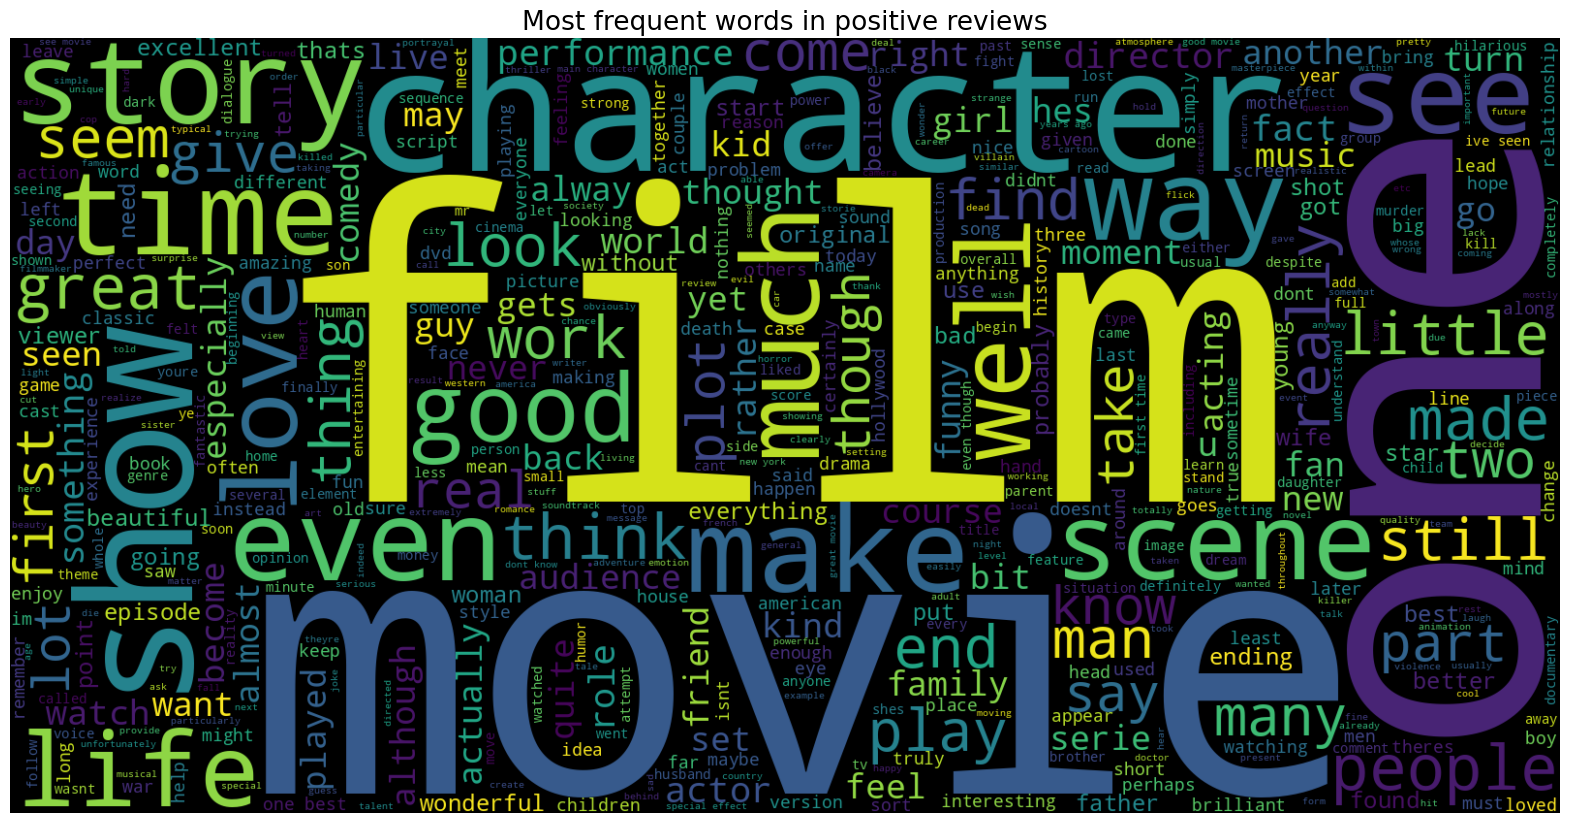

In [101]:
text = " ".join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words in positive reviews", fontsize=19)
plt.show()


In [102]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [90]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', ' count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


**Visualizing word content**

In [92]:
px.bar(pos_words, x='word', y=' count', title='Common words in positive reviews', color="word")

In [93]:
neg_reviews = df[df.sentiment == 2 ]
neg_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


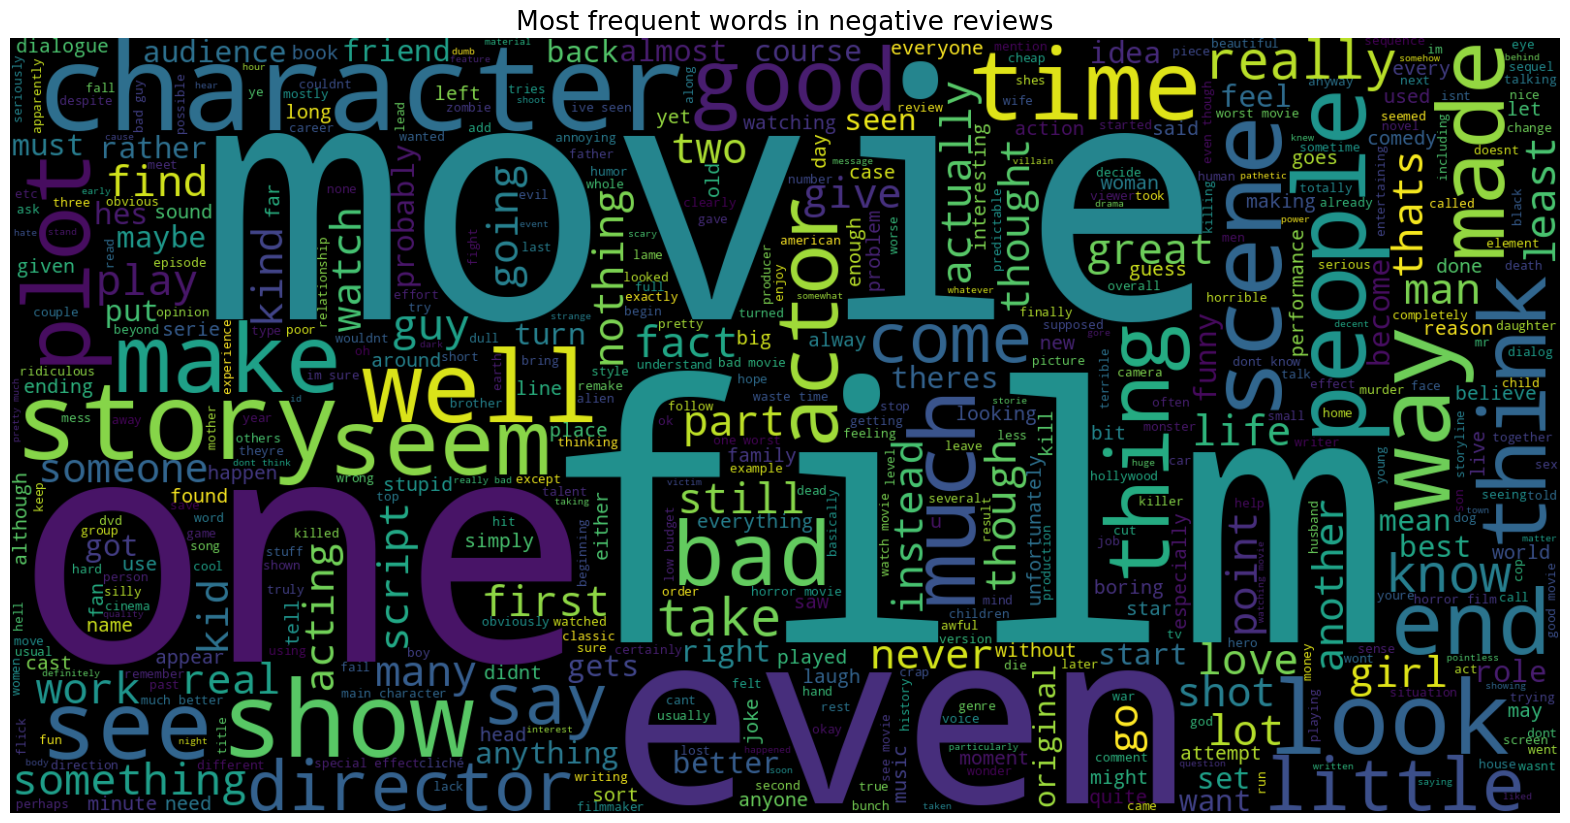

In [103]:
text = " ".join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words in negative reviews", fontsize=19)
plt.show()

In [104]:
count = Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [106]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [108]:
px.bar(neg_words, x='word', y='word', title='Common words in negative reviews', color="word")

**Training the Model**

In [109]:
X = df['review']
Y = df['sentiment']

In [110]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [112]:
print("Size of x_train is :", x_train.shape)
print("Size of y_train is :", y_train.shape)
print("Size of x_test is :", x_test.shape)
print("Size of y_test is :", y_test.shape)

Size of x_train is : (34704, 221795)
Size of y_train is : (34704,)
Size of x_test is : (14874, 221795)
Size of y_test is : (14874,)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f"Accuracy of Logistic Regression is: {log_reg_acc:.2f}")

Accuracy of Logistic Regression is: 0.89


In [121]:
print(confusion_matrix(y_test, log_reg_pred))
print("\n")
print(classification_report(y_test, log_reg_pred))

[[6784  729]
 [ 904 6457]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [122]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_acc= accuracy_score(y_test, mnb_predict)
print(f"Accuracy of Mutlinomial NB is: {mnb_acc:.2f}")

Accuracy of Logistic Regression is: 0.86


In [125]:
print(confusion_matrix(y_test, mnb_predict))
print("\n")
print(classification_report(y_test, mnb_predict))

[[6439 1074]
 [ 942 6419]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [127]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_predict = svc.predict(x_test)
svc_acc= accuracy_score(y_test, svc_predict)
print(f"Accuracy of SVC is: {svc_acc:.2f}")

Accuracy of SVC is: 0.89


In [128]:
print(confusion_matrix(y_test, svc_predict))
print("\n")
print(classification_report(y_test, svc_predict))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

